# Análise e predição de Churn Novexus - Challenge DataScience 2ª Edição 

## Importação de bibliotecas

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

## Leitura e Análise dos dados

In [120]:
with open("Telco-Customer-Churn.json") as f:
    json_bruto = json.load(f)

In [121]:
df = pd.json_normalize(json_bruto)
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [122]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [123]:
df = df.drop('customerID', axis=1)

In [124]:
df.describe(include='object') #permite visualizar colunas não numéricas

,Churn,customer.gender,customer.Partner,customer.Dependents,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Total
count,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267
unique,3,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531
top,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2
freq,5174,3675,3749,5086,6560,3495,3198,3608,3182,3195,3582,2896,2870,4005,4311,2445,11


### Analisando valores únicos de cada coluna

In [125]:
colunas = []
for coluna in df:
    colunas.append(coluna)

for coluna in colunas:
    print(coluna)
    print(df[coluna].unique())
    print('\t')

Churn
['No' 'Yes' '']
	
customer.gender
['Female' 'Male']
	
customer.SeniorCitizen
[0 1]
	
customer.Partner
['Yes' 'No']
	
customer.Dependents
['Yes' 'No']
	
customer.tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
	
phone.PhoneService
['Yes' 'No']
	
phone.MultipleLines
['No' 'Yes' 'No phone service']
	
internet.InternetService
['DSL' 'Fiber optic' 'No']
	
internet.OnlineSecurity
['No' 'Yes' 'No internet service']
	
internet.OnlineBackup
['Yes' 'No' 'No internet service']
	
internet.DeviceProtection
['No' 'Yes' 'No internet service']
	
internet.TechSupport
['Yes' 'No' 'No internet service']
	
internet.StreamingTV
['Yes' 'No' 'No internet service']
	
internet.StreamingMovies
['No' 'Yes' 'No internet service']
	
account.Contract
['One year' 'Month-to-month' 'Two year']
	
account.PaperlessBilling
['Yes' 'No']

Podemos ver que a coluna de Churn possui valores não preenchidos, quando o esperado era apenas sim/não. Por isso, será necessário remover as linhas contendo esse valor. Além desse caso, não parece haver nenhuma outra coluna com problemas.

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7267 non-null   object 
 1   customer.gender            7267 non-null   object 
 2   customer.SeniorCitizen     7267 non-null   int64  
 3   customer.Partner           7267 non-null   object 
 4   customer.Dependents        7267 non-null   object 
 5   customer.tenure            7267 non-null   int64  
 6   phone.PhoneService         7267 non-null   object 
 7   phone.MultipleLines        7267 non-null   object 
 8   internet.InternetService   7267 non-null   object 
 9   internet.OnlineSecurity    7267 non-null   object 
 10  internet.OnlineBackup      7267 non-null   object 
 11  internet.DeviceProtection  7267 non-null   object 
 12  internet.TechSupport       7267 non-null   object 
 13  internet.StreamingTV       7267 non-null   objec

As informações acima confirmam que temos todos os index posicionados e preenchidos corretamente, sem a presença de nulos

In [127]:
df['account.Charges.Total'].value_counts()

20.2       11
           11
19.55       9
19.75       9
19.9        9
           ..
2349.8      1
1253.5      1
2341.55     1
1643.25     1
151.8       1
Name: account.Charges.Total, Length: 6531, dtype: int64

In [128]:
df['Churn'].value_counts()

No     5174
Yes    1869
        224
Name: Churn, dtype: int64

### Tratando os dados

In [129]:
df = df[df['Churn'] != '']
df = df[df['account.Charges.Total'] != ' ']

In [130]:
print(df['Churn'].unique())

['No' 'Yes']


In [131]:
df['account.Charges.Total'].value_counts()

20.2      11
19.75      9
19.9       8
20.05      8
19.65      8
          ..
4297.6     1
38.7       1
181.8      1
510.8      1
151.8      1
Name: account.Charges.Total, Length: 6530, dtype: int64

In [132]:
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce') #corrige o tipo da coluna para numérica

In [133]:
df.dtypes

Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total        float64
dtype: object

In [134]:
df

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


Vemos que, mesmo tendo 7043 linhas, o index ainda vai até 7266. Sendo assim, é necessário corrigi-lo

In [135]:
df = df.reset_index(drop='True')
df

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7028,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7029,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7030,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


## Análises gráficas

### Distribuição do Churn por gênero

Text(0.5, 1.0, 'Distribuição do Churn por gênero')

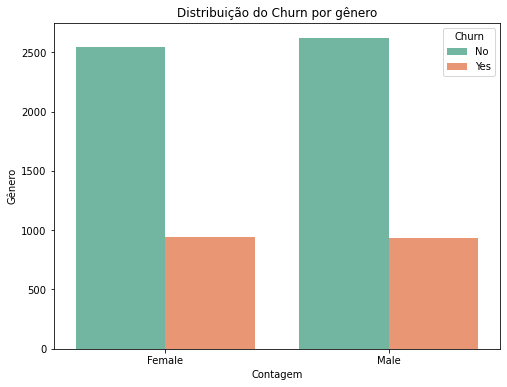

In [136]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'customer.gender', data = df, hue = 'Churn', palette = 'Set2')
plt.xlabel('Contagem')
plt.ylabel('Gênero')
plt.title('Distribuição do Churn por gênero')

In [139]:
def plota_grafico_barra(coluna1):
    plt.figure(figsize = (8,6))
    sns.countplot(x = coluna1, data = df, hue = 'Churn', palette = 'Set2')
    plt.ylabel('Contagem')
    plt.xlabel(coluna1)
    plt.title(f'Distribuição do Churn por {coluna1}')
    plt.show()

customer.gender


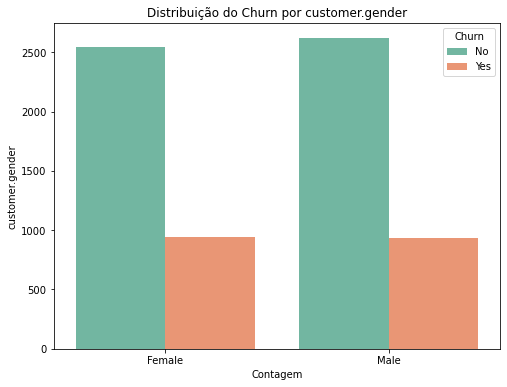

customer.Partner


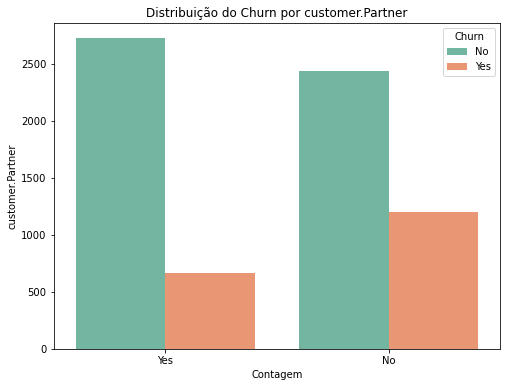

customer.Dependents


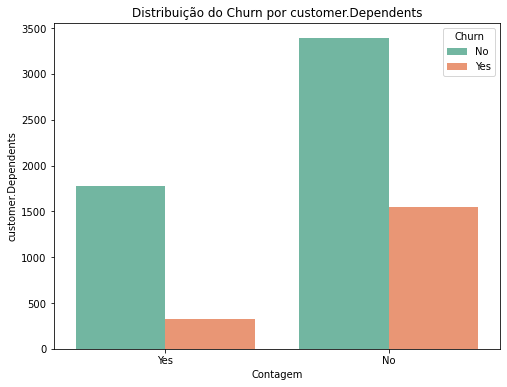

phone.PhoneService


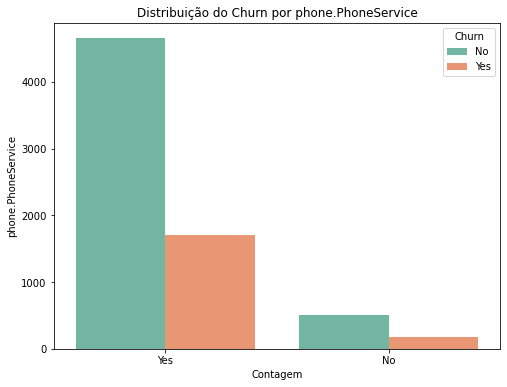

phone.MultipleLines


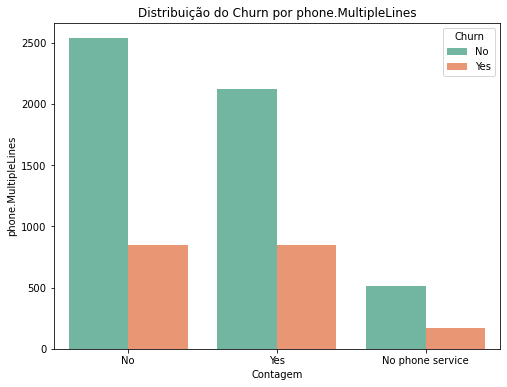

internet.InternetService


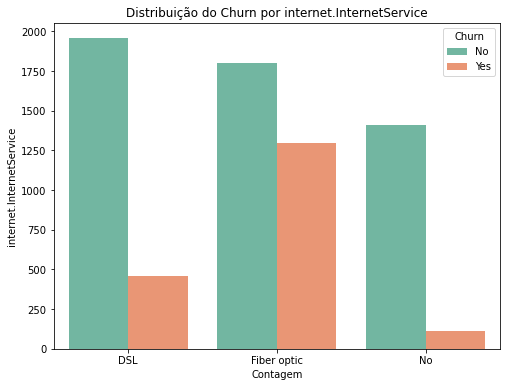

internet.OnlineSecurity


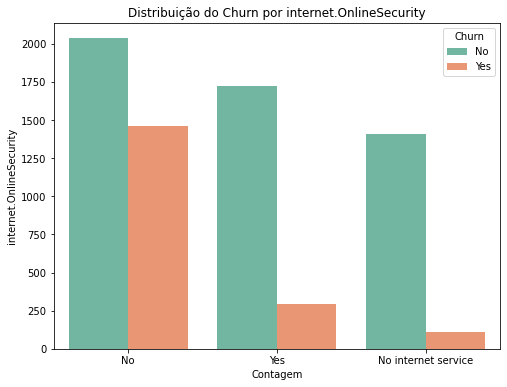

internet.OnlineBackup


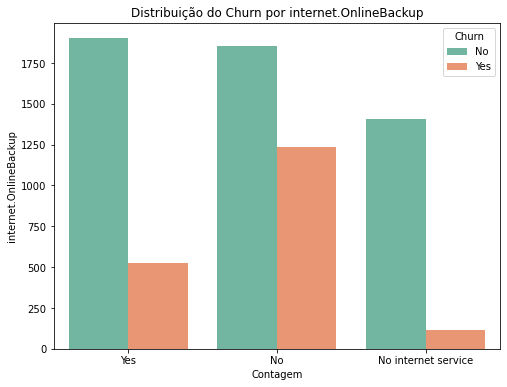

internet.DeviceProtection


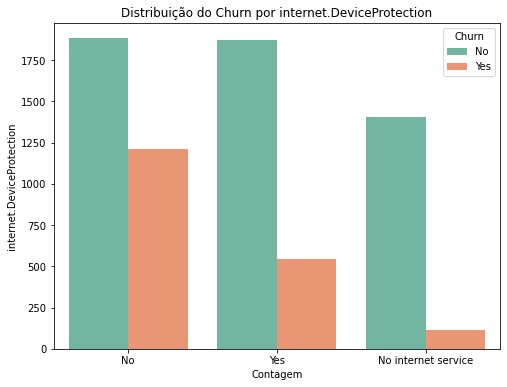

internet.TechSupport


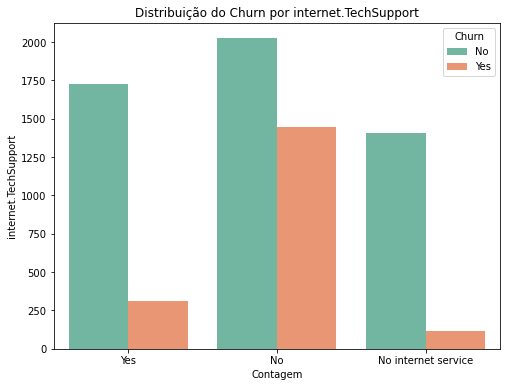

internet.StreamingTV


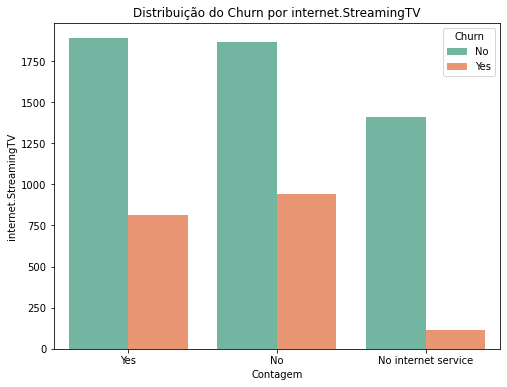

internet.StreamingMovies


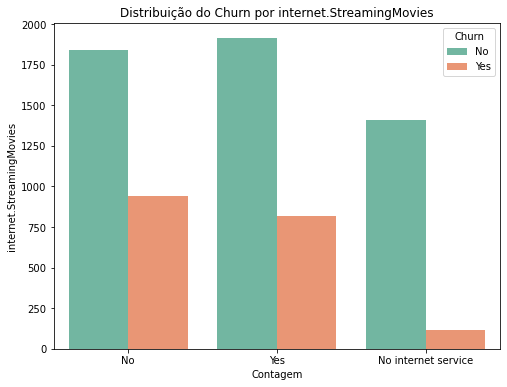

account.Contract


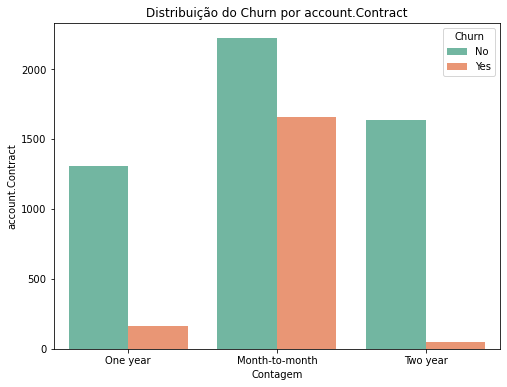

account.PaperlessBilling


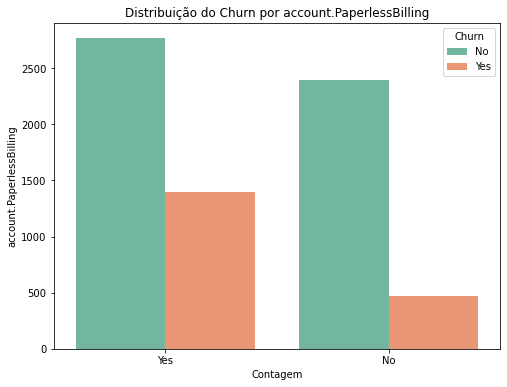

account.PaymentMethod


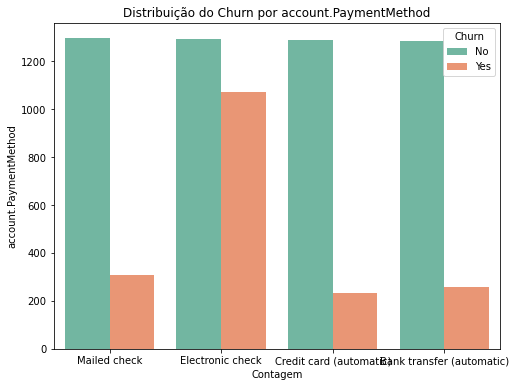

In [138]:
for coluna in colunas:
    if (coluna != "Churn") and (df[coluna].dtype == "object"):
        print(coluna)
        plota_grafico_barra(coluna)

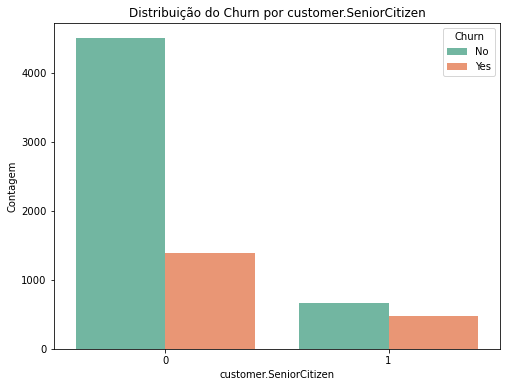

In [140]:
plota_grafico_barra('customer.SeniorCitizen')

In [145]:
df.dtypes

Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total        float64
dtype: object

In [151]:
def plota_boxplot(coluna):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Churn', y=coluna, data=df, palette='Set2')
    plt.xlabel(coluna)
    plt.ylabel('Valores')
    plt.title(f'Boxplot de Valores por {coluna}')
    plt.show()

customer.tenure


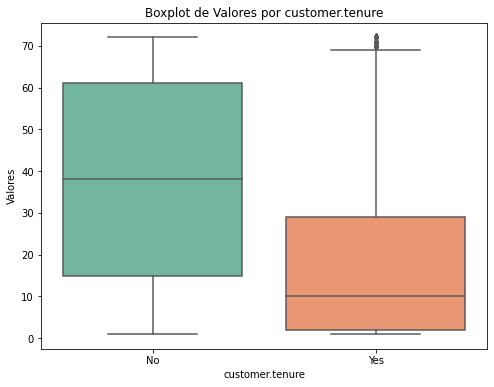

account.Charges.Monthly


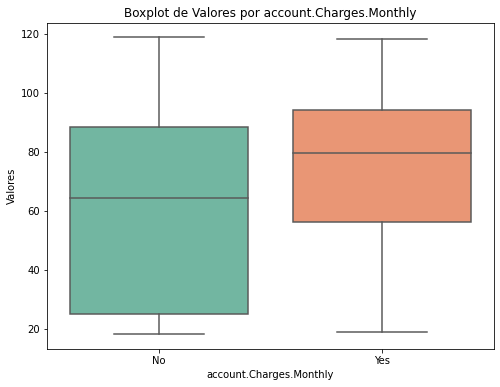

account.Charges.Total


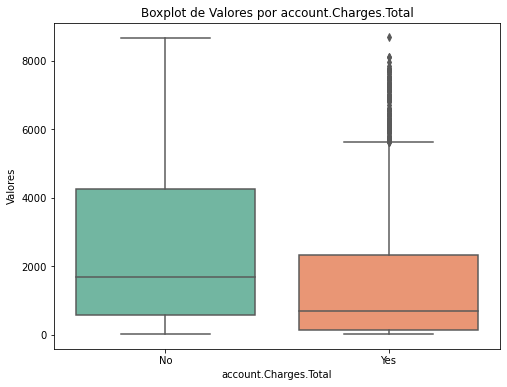

In [152]:
for coluna in colunas:
    if (coluna != "Churn") and (df[coluna].dtype != "object") and (coluna != 'customer.SeniorCitizen'):
        print(coluna)
        plota_boxplot(coluna)